# Week 2 exercises

In [1]:
# Imports
import random
import string
import time
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

#### Devise an experiment to discover the complexity of comparing strings in Python. Does the size of the string affect the efficiency of the string comparison and if so, what is the complexity of the comparison? In this experiment you might want to consider a best case, worst case, and average case complexity. Write a program that produces an XML file with your results in the format specified in this chapter. Then use the PlotData.py program to visualize those results.

In [5]:
# Create aphabet list
alphabet = string.ascii_lowercase
print(alphabet)

abcdefghijklmnopqrstuvwxyz


In [6]:
# Randomly choose letters
letters = random.choices(alphabet, k=5)
print(letters)

['n', 'j', 'j', 'i', 'b']


In [7]:
# Join letters together
example_str = ''.join(letters)
print(example_str)

njjib


In [8]:
# Define a function which returns a random string of arbitrary length
def random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

In [9]:
# Define function which repeats a single letter
def single_letter_string(length):
    if length <= 1:
        return None
    else:
        return 'a' * length

In [10]:
# Define a function which repeats a single letter except for the first or last place
def two_letter_string(length, first=True):
    if length <= 1:
        return None
    else:
        if first:
            return 'b' + 'a' * (length - 1)
        else:
            return 'a' * (length - 1) + 'b'

In [11]:
# Print example of 20-letter strings
print(f'Random: {random_string(20)}')
print(f'Single: {single_letter_string(20)}')
print(f'Single except first: {two_letter_string(20)}')
print(f'Single except first: {two_letter_string(20, first=False)}')

Random: mlnctdnewohngijlzscb
Single: aaaaaaaaaaaaaaaaaaaa
Single except first: baaaaaaaaaaaaaaaaaaa
Single except first: aaaaaaaaaaaaaaaaaaab


In [12]:
def compare_string_experiment(s1, s2, k=10000):
    """ Time the comparison of two strings, return time per comparison in ns """
    start = time.perf_counter_ns()
    for i in range(k):
        s1 == s2
    end = time.perf_counter_ns()
    
    return (end - start) / k

In [13]:
# Compare different cases
n_arr = np.arange(100, 10000, 100)     # Array of string lengths to test
t_ident = np.zeros(n_arr.shape)        # Time array for two identical strings
t_diffstart = np.zeros(n_arr.shape)    # Time array for strings where only first letter differs
t_diffend = np.zeros(n_arr.shape)      # Time array for strings where only last letter differs
t_random = np.zeros(n_arr.shape)       # Time array for two random string

# print(f'n_arr: {n_arr}')
# print(f't_ident: {t_ident}')
# print(f't_diffstart: {t_diffstart}')
# print(f't_diffend: {t_diffend}')
# print(f't_random: {t_random}')

for i, n in enumerate(n_arr):
    s_single1 = single_letter_string(n)              # n-length string with only the letter 'a'
    s_single2 = single_letter_string(n)              # n-length string with only the letter 'a'
    s_diffstart = two_letter_string(n)               # n-length string with first letter 'b', rest 'a'
    s_diffend = two_letter_string(n, first=False)    # n-length string with first letter 'a', rest 'b'
    s_random1 = random_string(n)                     # n-length string with random letters
    s_random2 = random_string(n)                     # n-length string with random letters
    
    t_ident[i] = compare_string_experiment(s_single1, s_single2)
    t_diffstart[i] = compare_string_experiment(s_single1, s_diffstart)
    t_diffend[i] = compare_string_experiment(s_single1, s_diffend)
    t_random[i] = compare_string_experiment(s_random1, s_random2)

Text(0, 0.5, 'String comparison time [ns]')

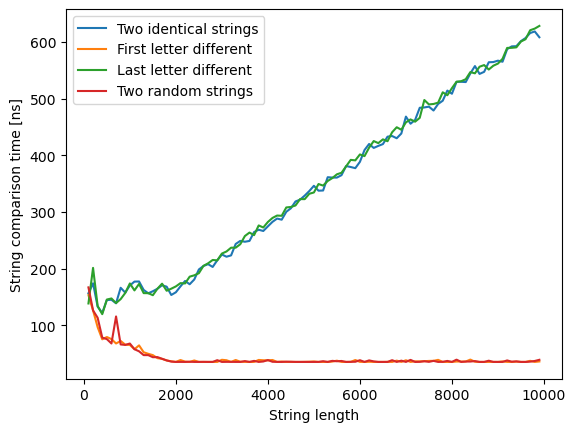

In [14]:
# Plot results
plt.plot(n_arr, t_ident, label='Two identical strings')
plt.plot(n_arr, t_diffstart, label='First letter different')
plt.plot(n_arr, t_diffend, label='Last letter different')
plt.plot(n_arr, t_random, label='Two random strings')
plt.legend()
plt.xlabel('String length')
plt.ylabel('String comparison time [ns]')

The results show that comparison time increases approximately linearly with the length of the string when comparing two identical strings, or when comparing strings when the last letter is different. When the two strings are random (almost all letters are different), or when the first letter is different, comparison time appears to be approximately independent of string length. This indicates that the comparison starts at the beginning of the string and stops as soon as two different characters are found. 

The time complexity is O(N) when comparing when comparing two identical strings, or when comparing strings when the last letter is different.
The time complexity is O(1) when comparing when comparing two random strings, or when the first letter is different.

## Exercise 2

#### Conduct an experiment to prove that the product of two numbers does not depend on the size of the two numbers being multiplied. Write a program that plots the results of multiplying numbers of various sizes together. HINT: To get a good reading you may want to do more than one of these multiplications and time them as a group since a multiplication happens pretty quickly in a computer. Verify that it truly is a O(1) operation. Do you see any anomalies? It might be explained by Python’s support of large integers. What is the cutoff point for handling multiplications in constant time? Why? Write a program that produces an XML file with your results in the format given in this chapter. Then visualize your results with the PlotData.py program provided in this chapter.

In [24]:
# Define a function which generate an arbitrary-length random integer number
def random_number(n):
    digits = string.digits
    random_num_string = random.choices(digits[1:]) + random.choices(digits, k=(n-1))
    return int(''.join(random_num_string))

In [29]:
random_number(25)

2950652693213990230555568

In [31]:
n_arr = np.arange(100, 10000, 100)
t_arr = np.zeros(n_arr.shape)
k_repeat = 100

for i, n in enumerate(n_arr):
    num1 = random_number(n)
    num2 = random_number(n)
    
    start = time.perf_counter_ns()
    for j in range(k_repeat):
        num1 * num2
    end = time.perf_counter_ns()
    t_arr[i] = (end - start) / k_repeat

# Plot results of experiment
plt.plot(n_arr, t_arr)
plt.xlabel('Number of digits in both numbers')
plt.ylabel('Multiplication processing time [ns]')

The results show that the time complexity is O(N^2) and that the product of two numbers actually DOES depend on the size of the two numbers being multiplied.

## Exercise 3

#### Write a recursive function intpow(x, n) that accepts two integers, x and n, and calculates x ^ n. Be sure to include it in a program with several test cases to test that your function works correctly

In [38]:
def intpow(x, n):
    
    # base condition
    if n == 0:
        return 1
    
    power = intpow(x, n // 2)
    
    #if odd
    if n & 1:
        return x * power * power
    
    #if even
    return int(power * power)

intpow(4, 3)

64

In [39]:
intpow(2, 4)

16

## Exercise 4

#### Write a recursive function that calculates the length of a string. You cannot use the len() function while calculating the length of the string. You must trust the function you write. Put this function in a program that prompts the user to enter a string and then prints the length of that string.

In [43]:
def count_char(input_string):
    
    if input_string == "":
        return 0
    else:
        return 1 + count_char(input_string[1:])

input_string = input("Enter a word: ")
print(f'String length is {count_char(input_string)}')


Enter a word:  hei


String length is 3
